Asian Option MC Simulation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Simulate a path for n discrete time steps & calculate the average, then take discounted payoff and iterate M times.

In [36]:
def asian_option(S0, K, T, r, q, v, n, M):
  delta_t = T/n
  paths = []
  Vm = []
  for _ in range(M):
    path = [S0]
    for _ in range(1,n):
      Z = np.random.randn()
      S_ti = path[-1]*np.exp((r-q-(v**2)/2)*delta_t + v*Z*np.sqrt(delta_t))
      path.append(S_ti)
    avg = np.mean(np.array(path))
    disc_payoff = np.maximum(avg - K, 0) * np.exp(-r*T)
    paths.append(path)
    Vm.append(disc_payoff)

  return {'Prices':Vm, 'Paths':paths}

Example.

In [57]:
S0, K, T, r, q, v, n, M = 100, 55,  1, 0.05,0.02,0.30, 252, 10000
dict_asian = asian_option(S0, K, T, r, q, v, n, M)

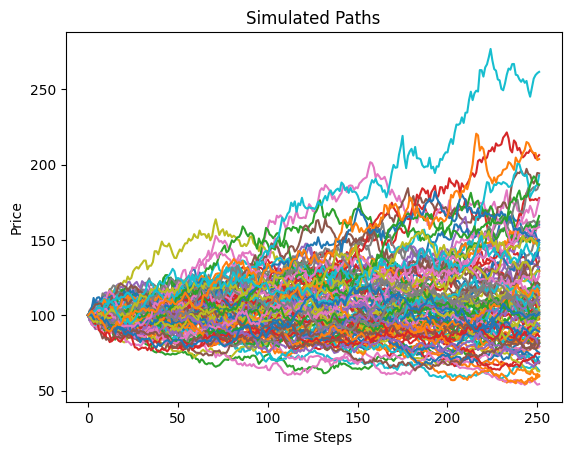

In [86]:
# k of the M paths below
k = 100 #can adjust
for i in range(M):
  plt.plot(dict_asian['Paths'][i]);
  if i > k:
    break
plt.title('Simulated Paths');
plt.xlabel('Time Steps');
plt.ylabel('Price');

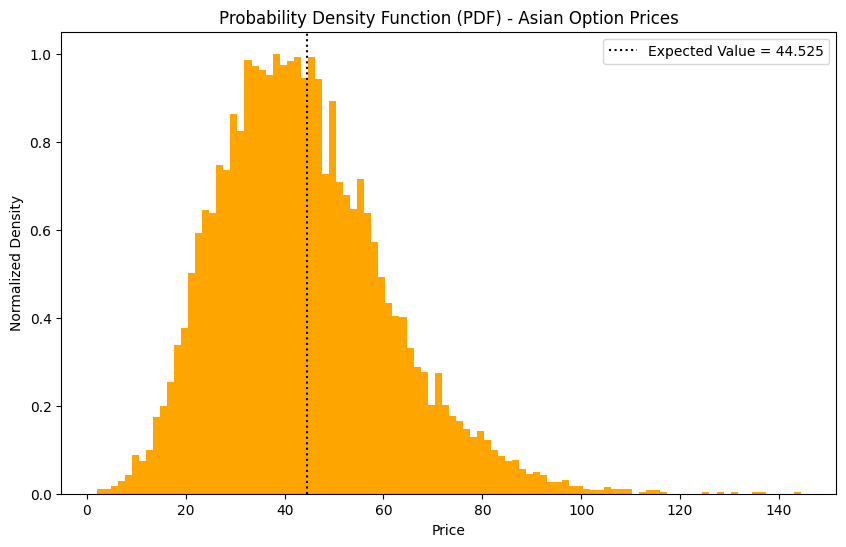

In [95]:
#Asian option price distribution
avg_val = np.mean(np.array(dict_asian['Prices']))
hist, bin_edges = np.histogram(dict_asian['Prices'], bins=100, density=True)
normalized_pdf = hist / np.max(hist)
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], normalized_pdf, width=np.diff(bin_edges), color='orange', alpha=1)
plt.axvline(avg_val, color='black', linestyle=':', label=f'Expected Value = {avg_val:.3f}')
plt.legend()
plt.title('Probability Density Function (PDF) - Asian Option Prices')
plt.xlabel('Price')
plt.ylabel('Normalized Density');
